1. You have been given a partially implemented code for a feed-forward neural network using PyTorch. Your task is to complete the missing parts of the code to make it functional.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        # Complete this line to pass the 
        #output of the first layer through the activation function
        x = self.fc2(x)
        # Complete this line to pass the 
        #output of the activation function through the second layer
        x = self.relu(x)
        return x

# Define the hyperparameters
input_size = 10
hidden_size = 20
label_size = 5
learning_rate = 0.001
num_epochs = 1000

# Create the neural network object
model = NeuralNetwork(input_size, hidden_size, label_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Generate some dummy data for training
train_data = torch.randn(100, input_size)
train_labels = torch.randint(label_size, (100,))

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    # Complete this line to pass the training data through the model and obtain the predictions
    outputs = model(train_data)

    # Compute the loss
    loss = criterion(outputs, train_labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Test the trained model
test_data = torch.randn(10, input_size)
with torch.no_grad():
    # Complete this line to pass the test data through the model 
    #and obtain the predictions
    test_outputs = model(test_data)

    # Print the predictions
    _, predicted = torch.max(test_outputs.data, 1)
    print("Predictions:", predicted)

Epoch: 100/1000, Loss: 1.6116511821746826
Epoch: 200/1000, Loss: 1.6108485460281372
Epoch: 300/1000, Loss: 1.6100966930389404
Epoch: 400/1000, Loss: 1.6093640327453613
Epoch: 500/1000, Loss: 1.6086370944976807
Epoch: 600/1000, Loss: 1.6079143285751343
Epoch: 700/1000, Loss: 1.607240915298462
Epoch: 800/1000, Loss: 1.606603980064392
Epoch: 900/1000, Loss: 1.6060194969177246
Epoch: 1000/1000, Loss: 1.6054507493972778
Predictions: tensor([1, 0, 0, 1, 2, 1, 1, 0, 1, 1])


2. In this coding exercise, you need to implement the training of a deep MLP on the MNIST dataset using PyTorch and manually tune the hyperparameters. Follow the steps below to proceed:

* Load the MNIST dataset using torchvision.datasets.MNIST. The dataset contains handwritten digit images, and it can be easily accessed through PyTorch's torchvision module.

In [2]:
# Load the MNIST dataset
import torchvision
from torchvision import datasets, transforms
learning_rate = 0.001
num_epochs = 10
batch_size = 32
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


* Define your deep MLP model. Specify the number of hidden layers, the number of neurons in each layer, and the activation function to be used. You can use the nn.Sequential container to stack the layers.

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

model = MLP()

* Set up the training loop and the hyperparameters. You can use the CrossEntropyLoss as the loss function and the Stochastic Gradient Descent (SGD) optimizer.

In [4]:
# Set hyperparameters
learning_rate = {'learning_rate': [0.1, 0.01, 0.001, 0.0001]}
num_epochs = 10
batch_size = 32

# Create data loaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the model
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

TypeError: '<' not supported between instances of 'dict' and 'float'

* Train the model by iterating over the training dataset for the specified number of epochs. Compute the loss, perform backpropagation, and update the model's parameters. 

In [ ]:
# Load MNIST data
from torchvision import datasets, transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [ ]:
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_dataloader:
        # Flatten the images
        images = images.view(-1, 784)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        if outputs is None:
            raise ValueError("Model's forward pass returned None.")

        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/10, Loss: 1.5400
Epoch 2/10, Loss: 0.7378
Epoch 3/10, Loss: 0.5383
Epoch 4/10, Loss: 0.4604
Epoch 5/10, Loss: 0.4186
Epoch 6/10, Loss: 0.3919
Epoch 7/10, Loss: 0.3732
Epoch 8/10, Loss: 0.3590
Epoch 9/10, Loss: 0.3478
Epoch 10/10, Loss: 0.3385


* Evaluate the trained model on the test dataset and calculate the accuracy (Please take a moment to consider the code below!)

In [ ]:
# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.view(-1, 784)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 90.75%


* Manually tune the hyperparameters, such as the learning rate, by experimenting with different values and observing the performance. You can also search for the optimal learning rate by using techniques like learning rate range test, where you gradually increase the learning rate and monitor the loss.

In [ ]:
# TODO
from sklearn.model_selection import GridSearchCV
# Flatten the images in the dataset
X_train = train_dataset.data.view(-1, 784)
y_train = train_dataset.targets
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)



InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
    (3): LogSoftmax(dim=1)
  )
) instead.

In [ ]:
# Print the best hyperparameters and its corresponding accuracy
print("Best Learning Rate: {:.4f}".format(grid_search.best_params_['learning_rate']))
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

3. In this coding exercise, you'll have an opportunity to explore the behavior of a deep neural network trained on the CIFAR10 image dataset. Follow the steps below:

* a. Construct a deep neural network (DNN) using **20 hidden layers**, each comprising **100 neurons. ** To facilitate this exploration, employ the **Swish activation function** for each layer. Utilize nn.ModuleList to manage the layers effectively.

* b. Load the CIFAR10 dataset for training your network. Utilize the appropriate function, such as **torchvision.datasets.CIFAR10**. The dataset consists of 60,000 color images, with dimensions of 32×32 pixels. It is divided into 50,000 training samples and 10,000 testing samples. With 10 classes in the dataset, ensure that your network has a **softmax output layer **comprising # 10 neurons. When modifying the model's architecture or hyperparameters, conduct a search to identify an appropriate  **learning rate**. Implement # early stopping during training and employ the # Nadam optimization algorithm.

* c. Experiment by # adding batch normalization to your network. Compare the learning curves obtained with and without batch normalization. Analyze whether the model converges faster with batch normalization and observe any improvements in its performance. Additionally, assess the impact of batch normalization on training speed.

* d. As an additional experiment, substitute batch normalization with SELU (Scaled Exponential Linear Units). Make the necessary adjustments to ensure the network self-normalizes. This involves standardizing the input features, initializing the network's weights using LeCun normal initialization (nn.init.kaiming_normal_), and ensuring that the DNN consists solely of dense layers. Observe the effects of utilizing SELU activation and self-normalization on the network's training stability and performance.

In [53]:
#Load and normalize CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

# Load the CIFAR10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [54]:
#Define a Deep Neural Network
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeepNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        for _ in range(20):
            self.layers.append(nn.Linear(input_size, hidden_size))
            self.layers.append(torch.nn.SiLU(inplace=False))
            input_size = hidden_size
        self.output_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.output_layer(x)
        return x
dnn = DeepNeuralNetwork(input_size=32*32*3, hidden_size=100, num_classes=10)


In [55]:
#Define a Loss function and optimizer
import torch.optim as optim

# Define the loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.NAdam(model.parameters())
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3)


In [56]:
#Train the network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dnn(inputs.view(inputs.size(0), -1))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')

[1,     1] loss: 0.046
[1,    51] loss: 2.302
[1,   101] loss: 2.302
[1,   151] loss: 2.299
[1,   201] loss: 2.306
[1,   251] loss: 2.300
[1,   301] loss: 2.309
[1,   351] loss: 2.303
[1,   401] loss: 2.307
[1,   451] loss: 2.301
[1,   501] loss: 2.312
[1,   551] loss: 2.309
[1,   601] loss: 2.305
[1,   651] loss: 2.305
[1,   701] loss: 2.303
[1,   751] loss: 2.297
[1,   801] loss: 2.303
[1,   851] loss: 2.304
[1,   901] loss: 2.309
[1,   951] loss: 2.304
[1,  1001] loss: 2.306
[1,  1051] loss: 2.303
[1,  1101] loss: 2.306
[1,  1151] loss: 2.303
[1,  1201] loss: 2.302
[1,  1251] loss: 2.300
[1,  1301] loss: 2.310
[1,  1351] loss: 2.300
[1,  1401] loss: 2.306
[1,  1451] loss: 2.305
[1,  1501] loss: 2.308
[1,  1551] loss: 2.303
[1,  1601] loss: 2.300
[1,  1651] loss: 2.301
[1,  1701] loss: 2.305
[1,  1751] loss: 2.297
[1,  1801] loss: 2.303
[1,  1851] loss: 2.298
[1,  1901] loss: 2.304
[1,  1951] loss: 2.301
[1,  2001] loss: 2.309
[1,  2051] loss: 2.305
[1,  2101] loss: 2.301
[1,  2151] 

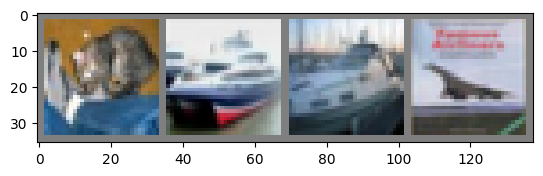

GroundTruth:  cat   ship  ship  plane


In [57]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [58]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = dnn(inputs.view(inputs.size(0), -1))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %


In [59]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = dnn(inputs.view(inputs.size(0), -1))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 100.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %


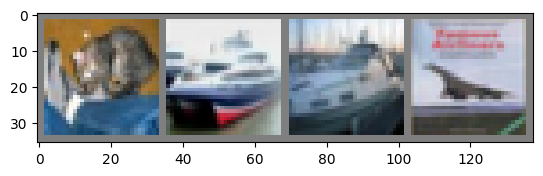

GroundTruth:  cat   ship  ship  plane


In [60]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

adding batch normalization

In [67]:
class DNN(nn.Module):
    def __init__(self, use_batchnorm=False):
        super(DNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        for _ in range(20):
            self.hidden_layers.append(nn.Sequential(
                nn.Linear(100, 100),
                nn.BatchNorm1d(100) if use_batchnorm else nn.Identity(),
                Swish()
            ))
        self.output_layer = nn.Linear(100, 10)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x


dnn_bn = DeepNeuralNetwork(input_size=32*32*3, hidden_size=100, num_classes=10)


substitute batch normalization with SELU (Scaled Exponential Linear Units)

In [66]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        for _ in range(20):
            self.hidden_layers.append(nn.Sequential(
                nn.Linear(100, 100),
                nn.SELU()
            ))
        self.output_layer = nn.Linear(100, 10)

        # Initialize the weights using LeCun normal initialization
        for layer in self.hidden_layers:
            nn.init.kaiming_normal_(layer[0].weight, nonlinearity='linear')
        nn.init.kaiming_normal_(self.output_layer.weight, nonlinearity='linear')

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x